In [1]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
# Now you can import the TimeSeriesDataset class
from TimeSeriesDataset import TimeSeriesDataset as TSD

In [2]:
# initialize dataset by downloading dataset or downloading the data from polity_url
dataset = TSD(categories=['sc'], template_path='../datasets/test.csv')
# initialize the time array
dataset.initialize_dataset_grid(-10000,2000,100)

Loaded template from ../datasets/test.csv
Downloaded 839 rows


In [3]:
dataset.download_all_categories()
dataset.save_dataset(path = '../datasets')

In [4]:
# import dataset
dataset.load_dataset(path = "../datasets")


# remove all rows that have less than 30% of the columns filled in
dataset.remove_incomplete_rows(nan_threshold=0.3)
# build the social complexity variables
dataset.build_social_complexity()


In [6]:
# impute missing data
dataset.impute_missing_values()

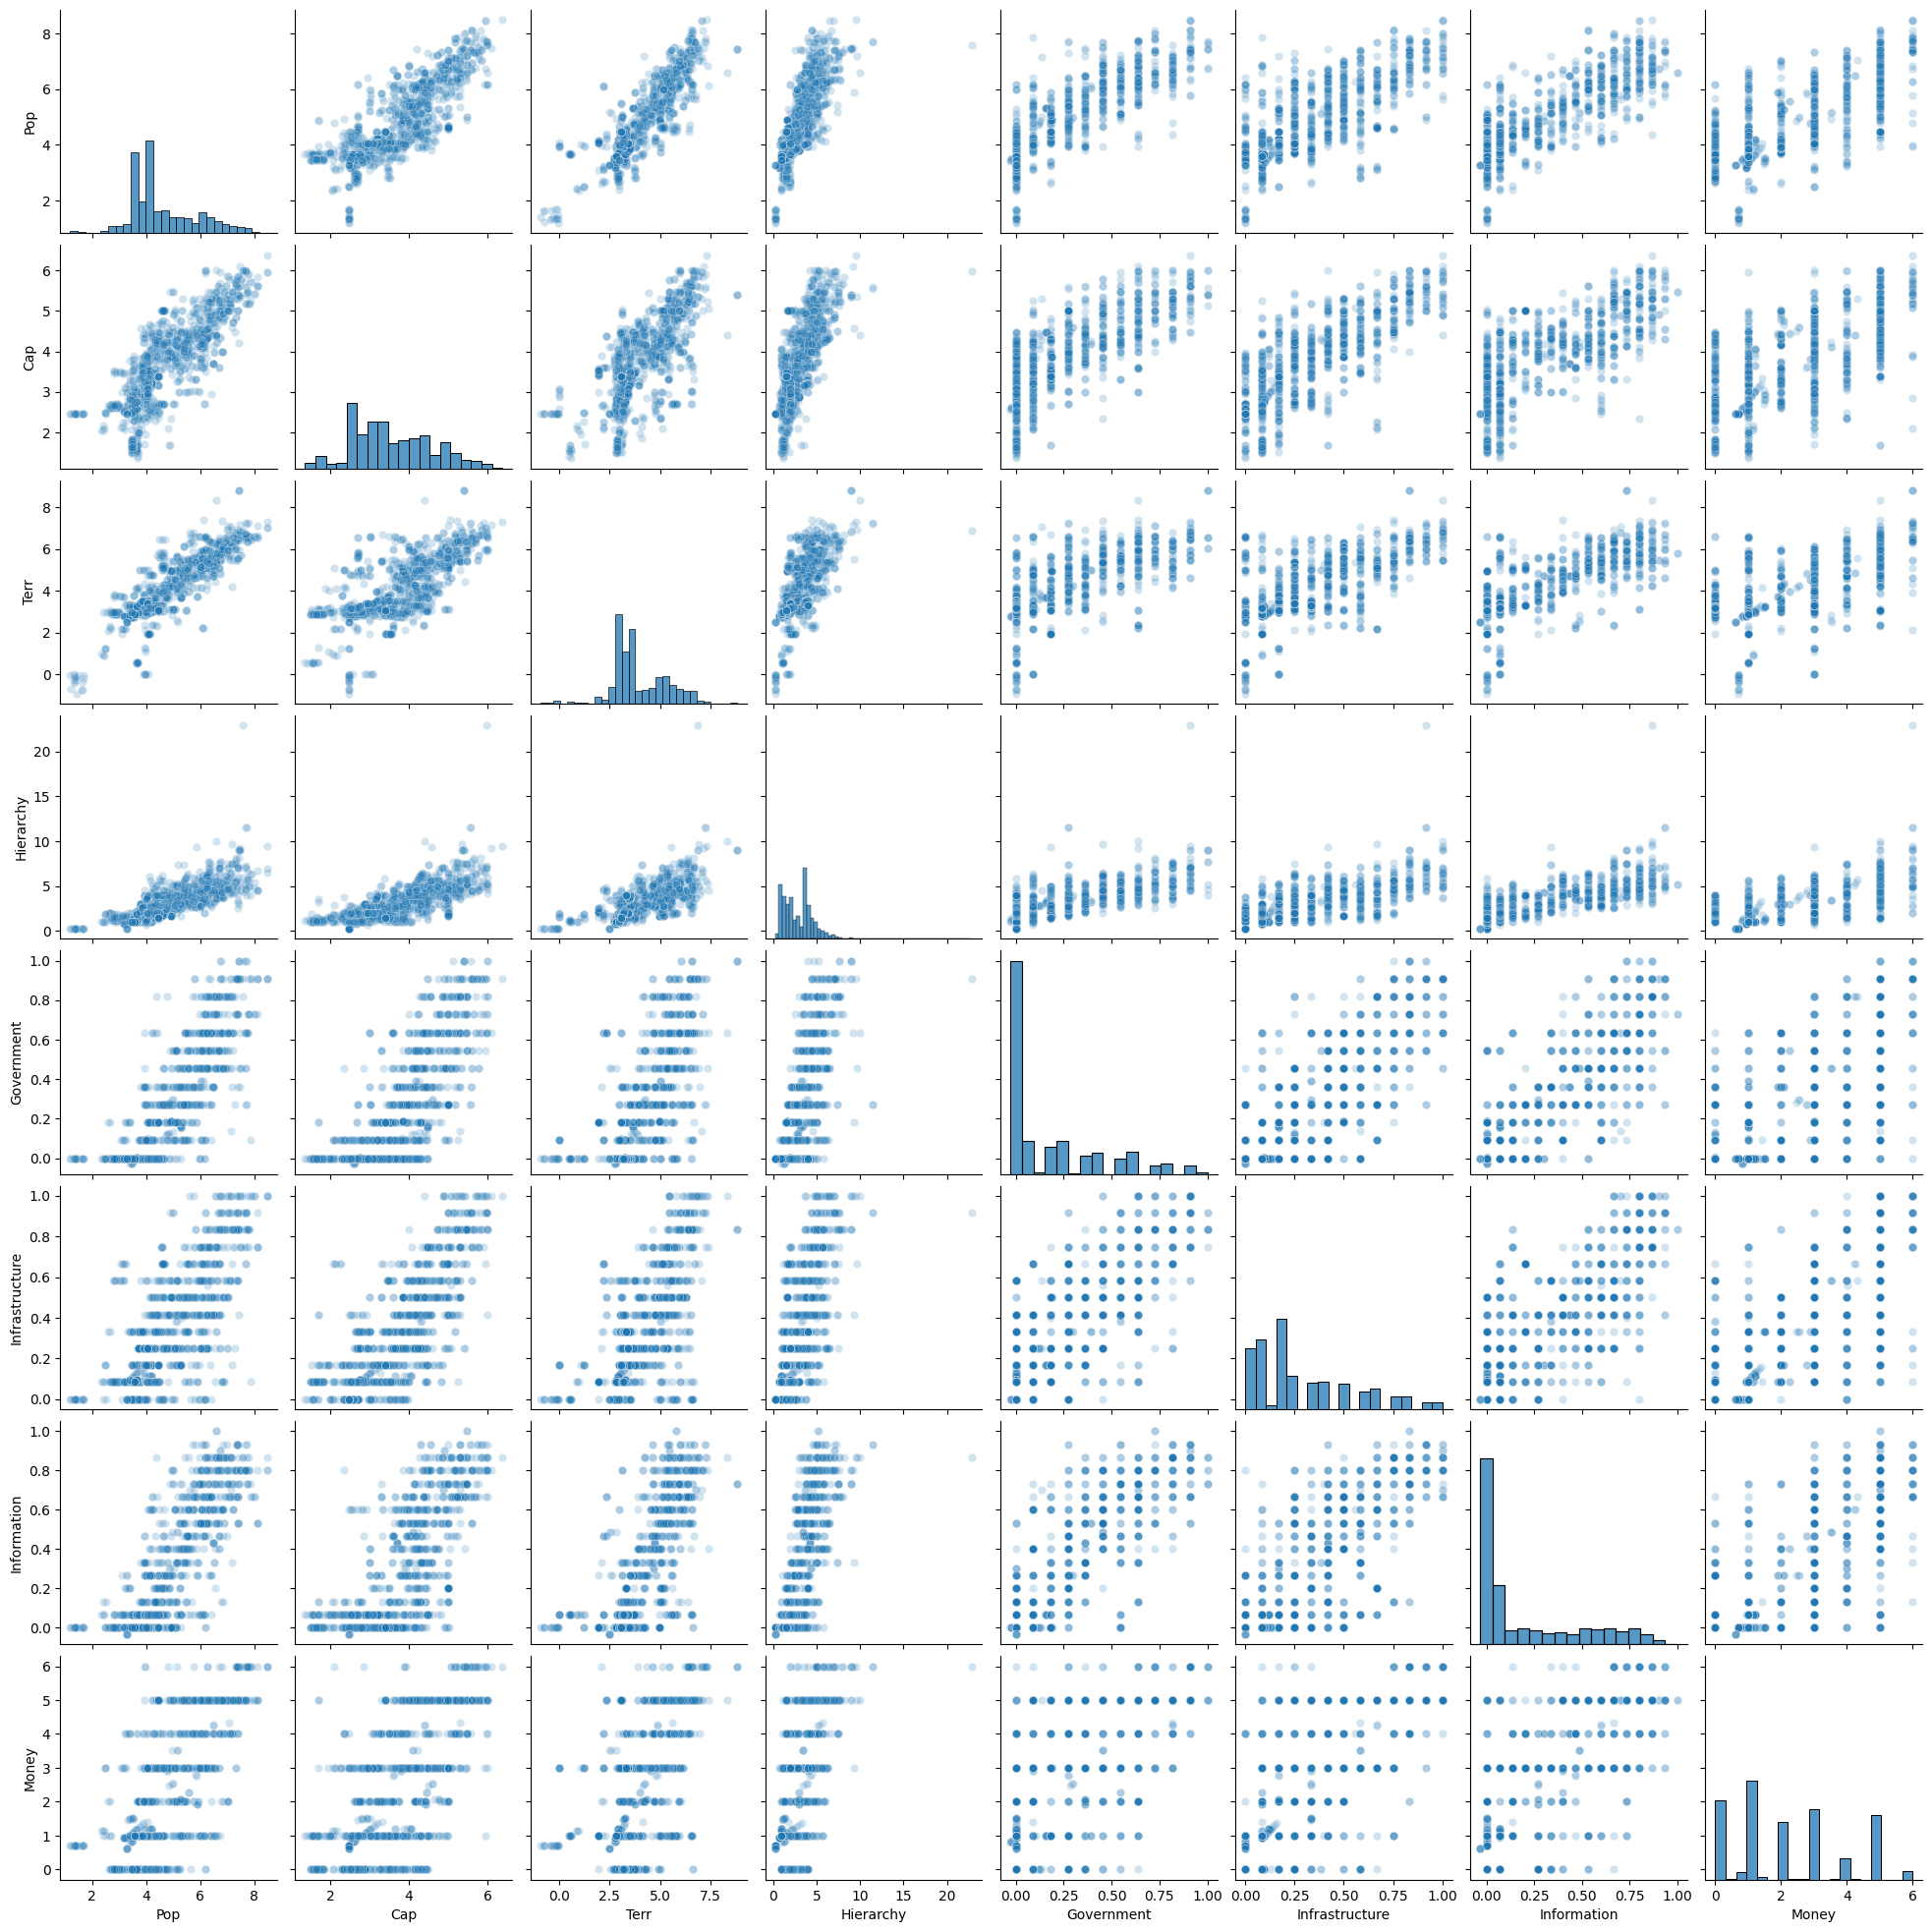

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
sns.pairplot(dataset.scv_imputed[sc_columns], plot_kws={'alpha': 0.2})
plt.show()

In [20]:
import pandas as pd
import pyreadr
data = pyreadr.read_r("/Users/mperuzzo/Documents/PT_analysis/fromJim2/sql_data_13may24_TableDat_5n_100yrs.Rdata")

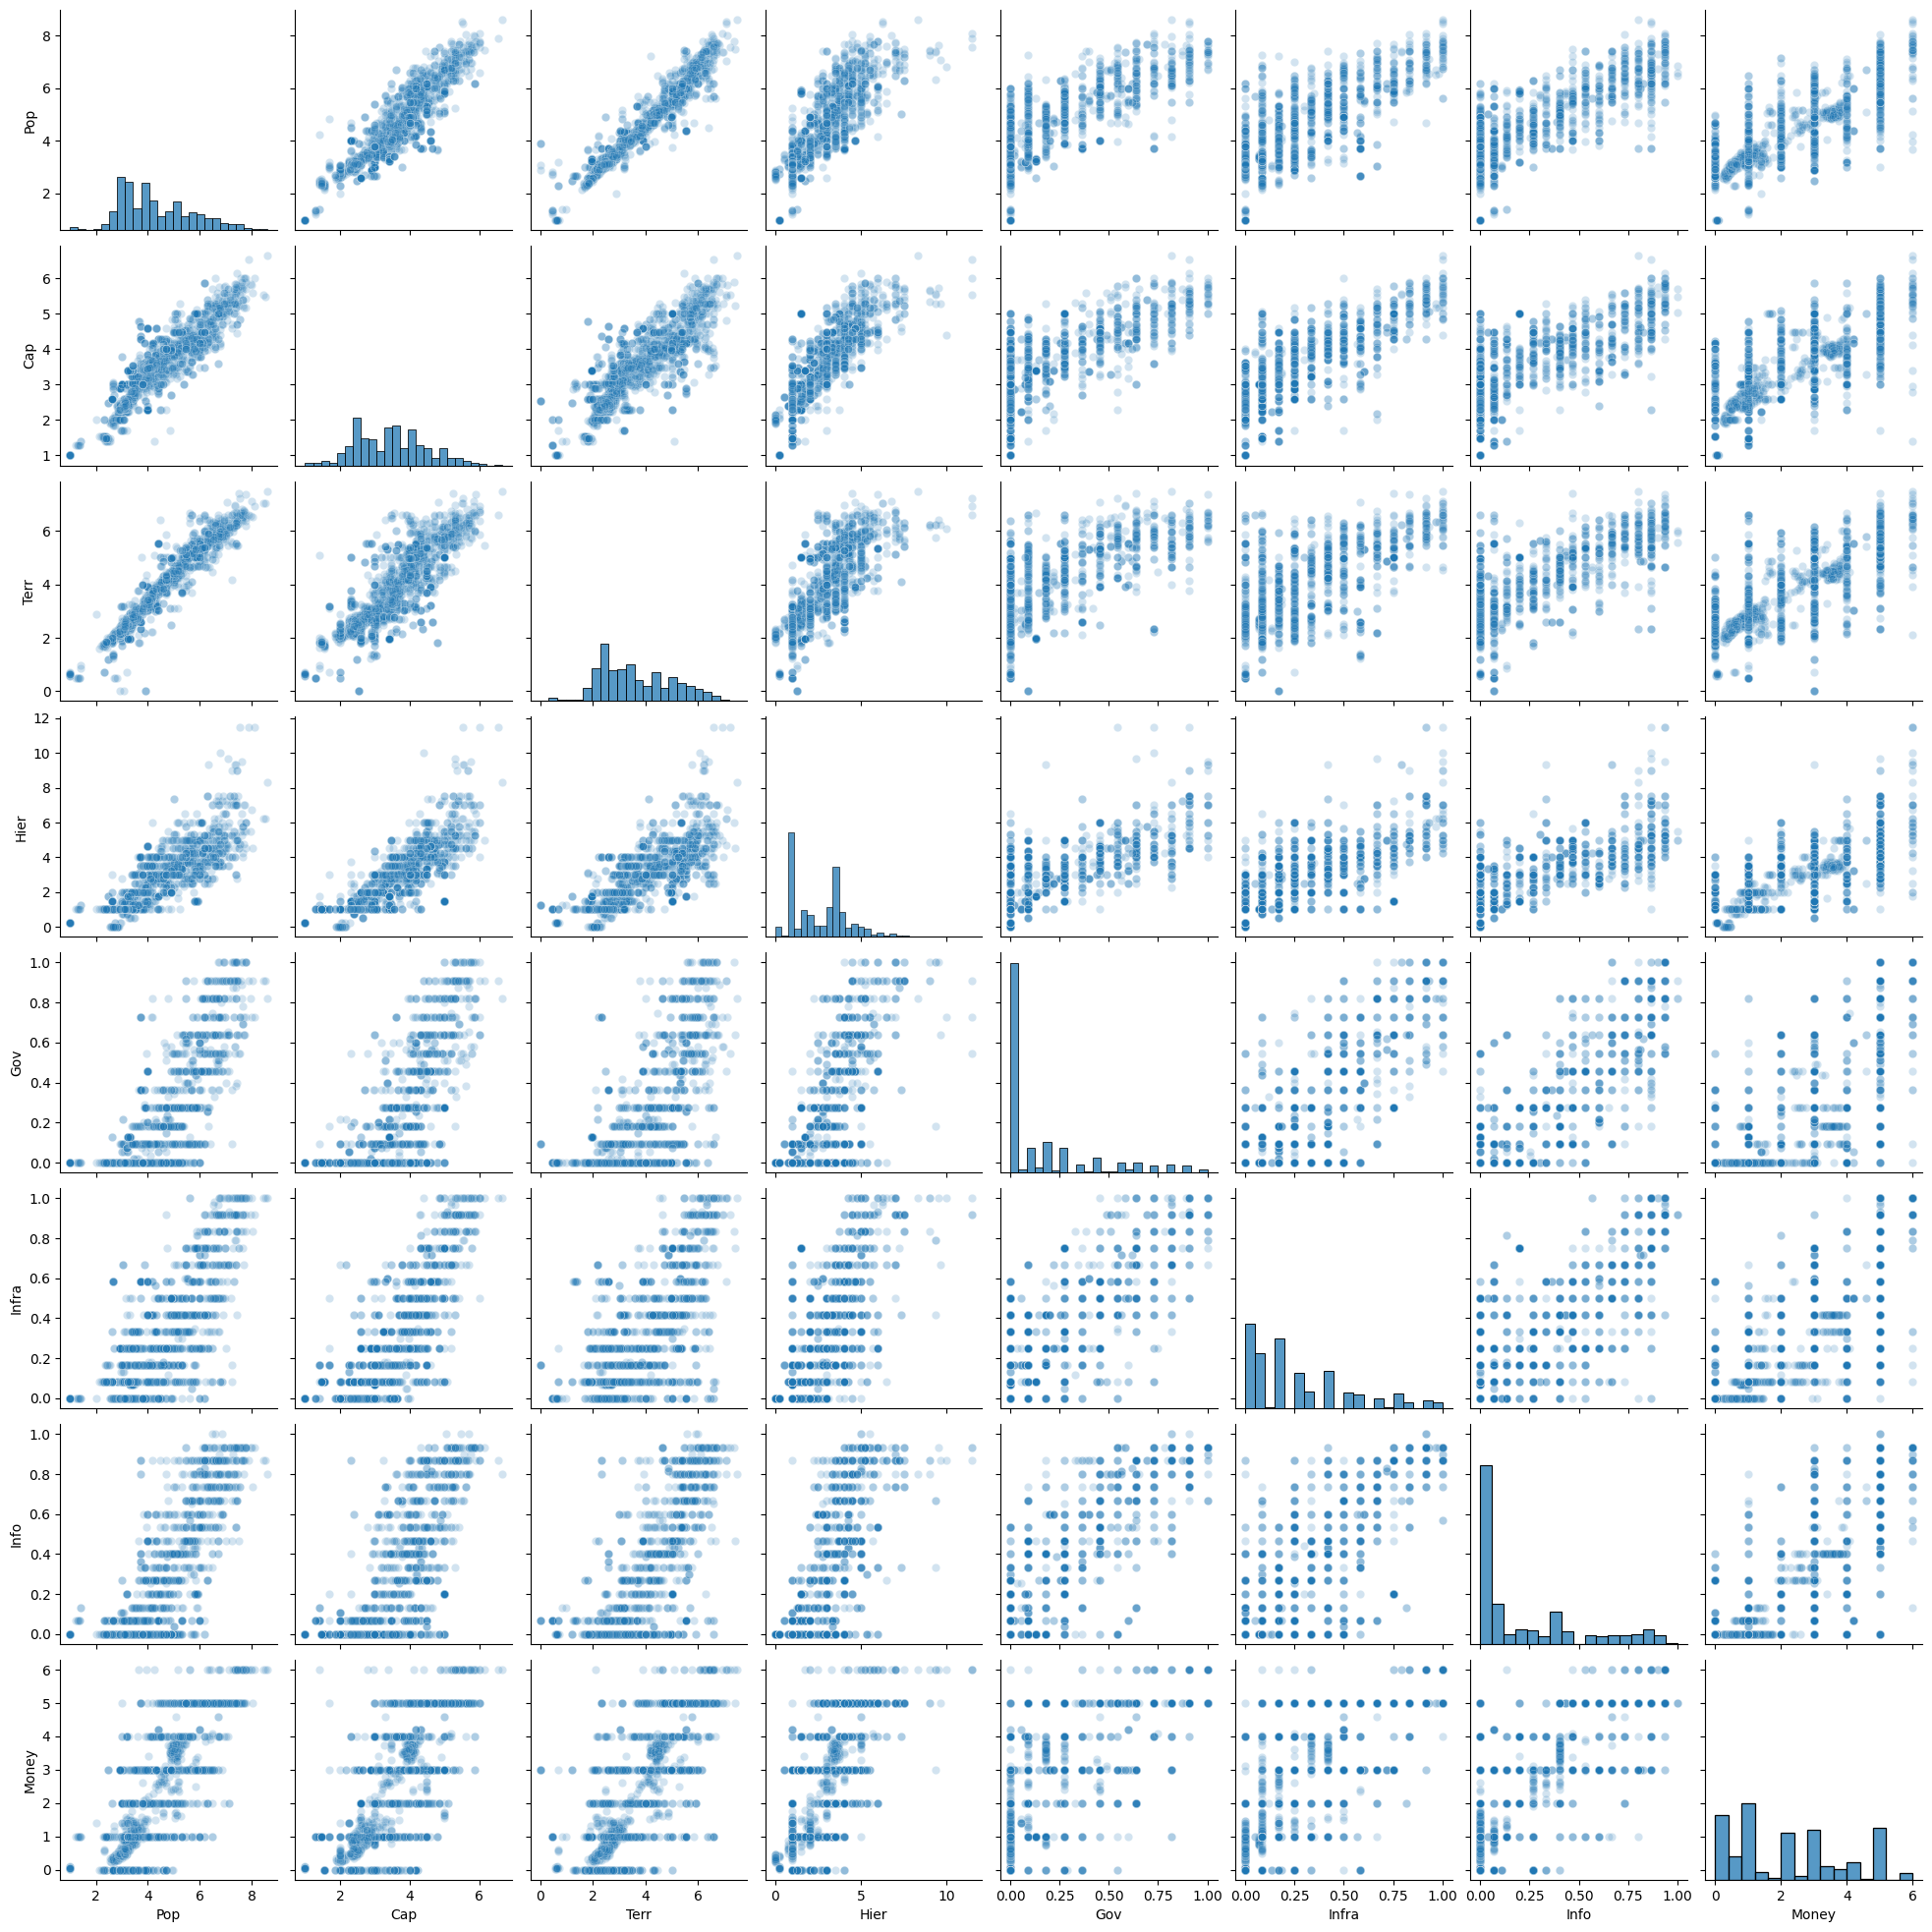

In [25]:

sc_columns = ['Pop','Cap','Terr','Hier', 'Gov', 'Infra', 'Info', 'Money']

sns.pairplot(data["imp.cc.mean"][sc_columns], plot_kws={'alpha': 0.2})
plt.show()